In [186]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [187]:
# Sklearn library for implementing Machine Learning models and processing of data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [188]:
#importing the dataset
dataset = pd.read_csv('/home/user/data/Breast_Cancer_Data_CSV.csv')
dataset.drop(['ID number'], axis=1, inplace=True)

print("Cancer data set dimensions : {}".format(dataset.shape))
dataset.head()

Cancer data set dimensions : (569, 31)


radius.mean  texture.mean  perimeter.mean  area.mean  smoothness.mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness.mean  concavity.mean  concave points.mean  symmetry.mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal dimension    ...      texture.w  perimeter.w  area.w  smoothness.w  \
0            0.07871    ...          17.33       184.60  2019.0        0.1622   
1            0.05667    ...          23.41       158.80  1956.0        0.1238   
2            0.05999    ...          25.53       152.50  1709.0        0.1444   
3            0.09744    ...          26.50        98.87   567.7        0.2098   
4            0.05883    ...          16.67       152.20  1575.0        0.1374   

   compactness.w  concavity.w  concave points.w  symmetry.w  \
0         0.6656       0.7119            0.2654      0.4601   
1         0.1866       0.2416            0.1860      0.2750   
2         0.4245       0.4504            0.2430      0.3613   
3         0.8663       0.6869            0.2575      0.6638   
4         0.2050       0.4000            0.1625      0.2364   

   fractal dimension.w  Diagnosis  
0              0.11890          M  
1              0.08902          M  
2              0.08758          M  
3              0.17300          M  
4              0.07678          M  

[5 rows x 31 columns]

In [189]:
# split dataframe into two based on diagnosis
dataset = shuffle(dataset)

# X = dataset.iloc[:, :-1].values
Y = dataset.pop('Diagnosis')
X = dataset

In [190]:
print(Y.unique())
Y = Y.map({'M': 1, 'B': 0})  #Encoding categorical data values
print(Y.unique())

['M' 'B']
[1 0]


In [191]:
# split our dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
print(X_train.mean(axis=0))
X_test = scaler.transform(X_test)
print(X_test.mean(axis=0))

[-9.46200126e-16  7.23039719e-16  3.19119382e-16 -1.56212285e-16
 -2.00844366e-17  5.13268936e-17 -5.13268936e-17  0.00000000e+00
  1.16266572e-15  1.78528326e-16 -4.68636855e-17 -7.14113302e-17
  2.25392011e-16  4.46320814e-17 -3.12424570e-16  9.37273709e-17
  3.57056651e-17 -1.78528326e-16 -3.43667027e-16 -2.23160407e-18
  1.85223138e-16 -5.75753850e-16  2.18697199e-16  1.22738224e-16
  2.38781635e-16  1.33896244e-17 -7.81061424e-17 -1.76296721e-16
 -2.14233991e-16 -1.08009637e-15]
[ 0.09042209 -0.09017492  0.08870921  0.12261548 -0.03214772  0.00590519
 -0.01806404 -0.01493757  0.04392402 -0.03657289  0.15955937 -0.08822509
  0.14820771  0.23762433 -0.12130755 -0.00697142 -0.05599851 -0.13639054
  0.0279137   0.04923451  0.08896116 -0.13465217  0.08081482  0.11978937
 -0.12920354  0.02132954 -0.00780344 -0.05244179  0.02996088  0.0527163 ]


In [192]:
def draw_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(
        data=cm,
        columns=['Predicted:0', 'Predicted:1'],
        index=['Actual:0', 'Actual:1'])
    TN = cm[0, 0]
    TP = cm[1, 1]
    FN = cm[1, 0]
    FP = cm[0, 1]
    Acuuracy = round((TN + TP) / float(TN + TP + FN + FP), 3)
    Misclassification = 1 - Acuuracy
    Sensitivity = round(TP / (float(TP + FN)), 3)
    Specifity = round(TN / (float(TN + FP)), 3)
    Precision = round(TP / (TP + FP), 3)
    print('Acuuracy = ', Acuuracy, 'Sensitivity =', Sensitivity, 'Specifity =',
          Specifity, ' Precision =', Precision)
    plt.figure(figsize=(8, 5))
    sn.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [193]:
# LogisticRegression model

In [194]:
def logistic_reg():
    from sklearn.linear_model import LogisticRegression
    logistic = LogisticRegression()
    logistic.fit(X_train,y_train)
    y_pred = logistic.predict(X_train)
    draw_confusion_matrix(y_train,y_pred)
    y_pred = logistic.predict(X_test)
    draw_confusion_matrix(y_test,y_pred)

Acuuracy =  0.987 Sensitivity = 0.974 Specifity = 0.996  Precision = 0.993


Acuuracy =  0.988 Sensitivity = 0.983 Specifity = 0.991  Precision = 0.983


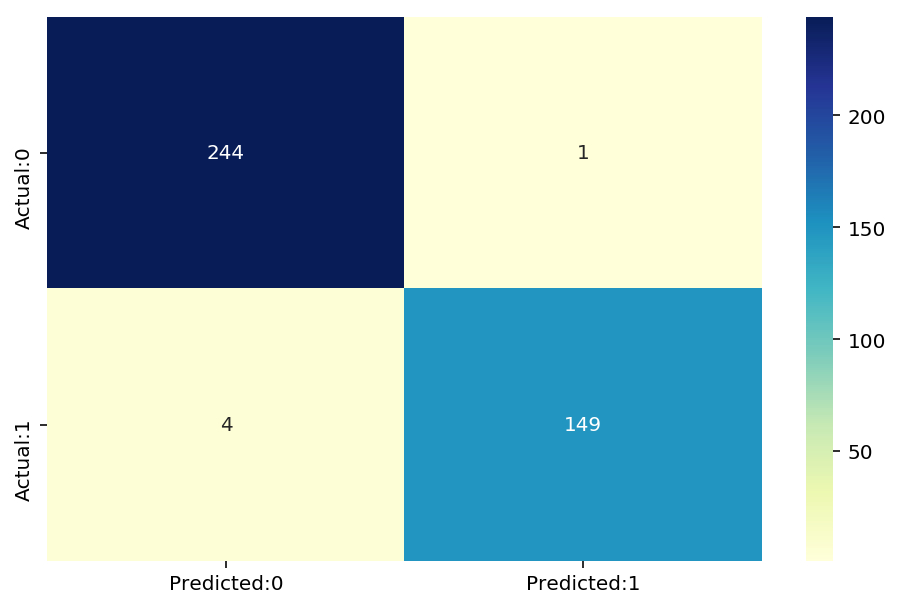

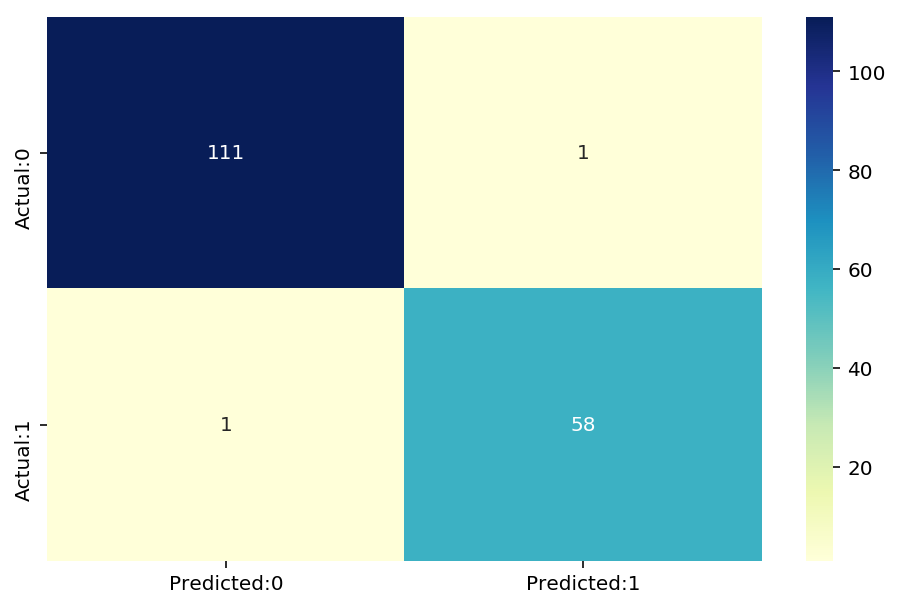

In [195]:
logistic_reg()

In [196]:
#K Neighbors Classifier
# The classification score varies based on different values of neighbors that we choose

In [197]:
def find_max_knn_score():
    knn_scores = []
    for k in range(1,21):
        knn_classifier = KNeighborsClassifier(n_neighbors = k)
        knn_classifier.fit(X_train, y_train)
        knn_scores.append(knn_classifier.score(X_test, y_test))
    return np.argmax(knn_scores) + 1

In [198]:
def knn_model():
    m = find_max_knn_score()
    knn = KNeighborsClassifier(n_neighbors = m)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    draw_confusion_matrix(y_test,y_pred)

Acuuracy =  0.977 Sensitivity = 0.966 Specifity = 0.982  Precision = 0.966


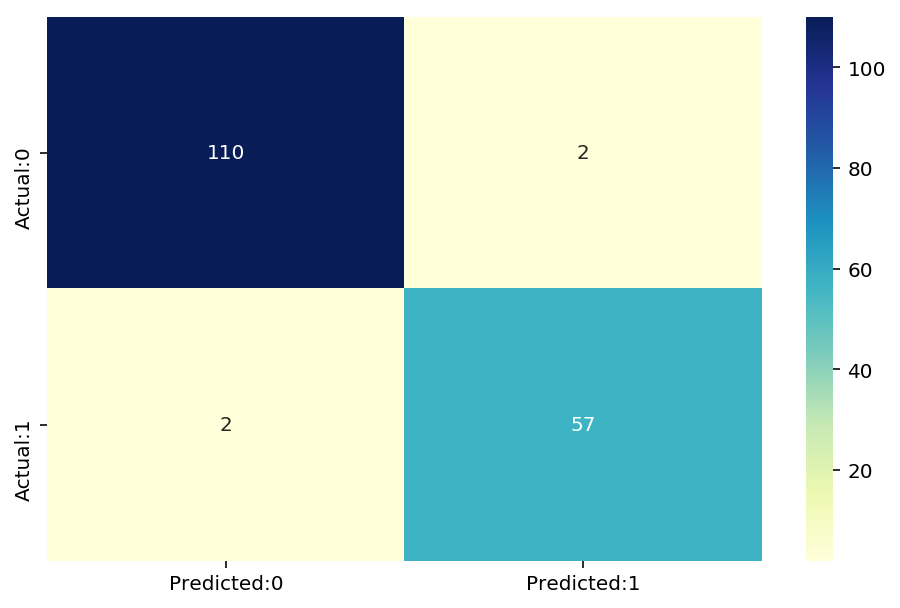

In [199]:
knn_model()

In [200]:
#Support Vector Classifier (SVC)

In [201]:
def SVC_model():
    from sklearn import svm
    clf = svm.SVC(gamma='scale')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    draw_confusion_matrix(y_test,y_pred)

Acuuracy =  0.977 Sensitivity = 0.966 Specifity = 0.982  Precision = 0.966


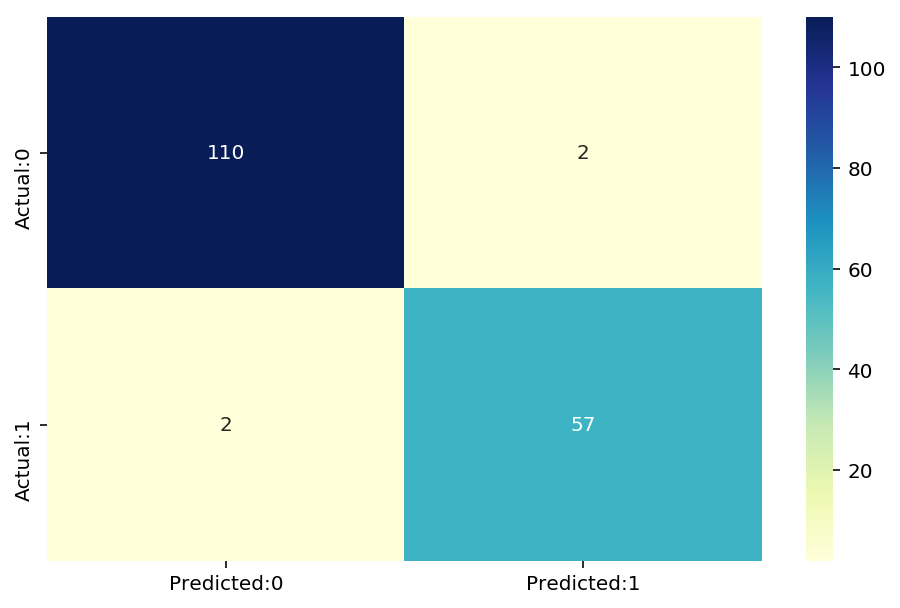

In [202]:
SVC_model()

In [203]:
def svc_scores():
    svc_scores = []
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    for i in range(len(kernels)):
        svc_classifier = SVC(kernel = kernels[i])
        svc_classifier.fit(X_train, y_train)
        svc_scores.append(svc_classifier.score(X_test, y_test))
    colors = rainbow(np.linspace(0, 1, len(kernels)))
    plt.bar(kernels, svc_scores, color = colors)
    for i in range(len(kernels)):
        plt.text(i, svc_scores[i], round(svc_scores[i],3))
        plt.xlabel('Kernels')
        plt.ylabel('Scores')
        plt.title('Support Vector Classifier scores for different kernels')
    best_kernel = kernels[np.argmax(svc_scores)]
    return(best_kernel)

In [204]:
def svc_model(kernel):
    print("SVC using kernel {}".format(kernel))
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(X_train,y_train)
    y_pred=svc_classifier.predict(X_test)
    draw_confusion_matrix(y_test,y_pred)

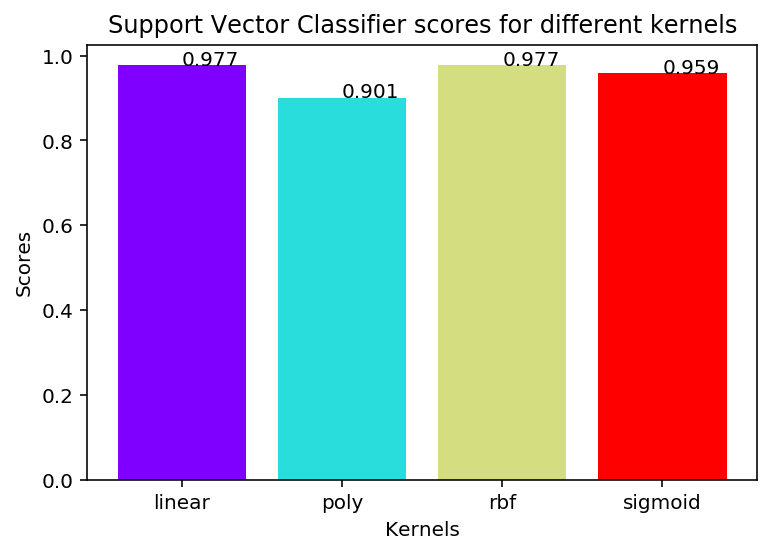

In [205]:
best_kernel = svc_scores()

SVC using kernel linear
Acuuracy =  0.977 Sensitivity = 0.949 Specifity = 0.991  Precision = 0.982


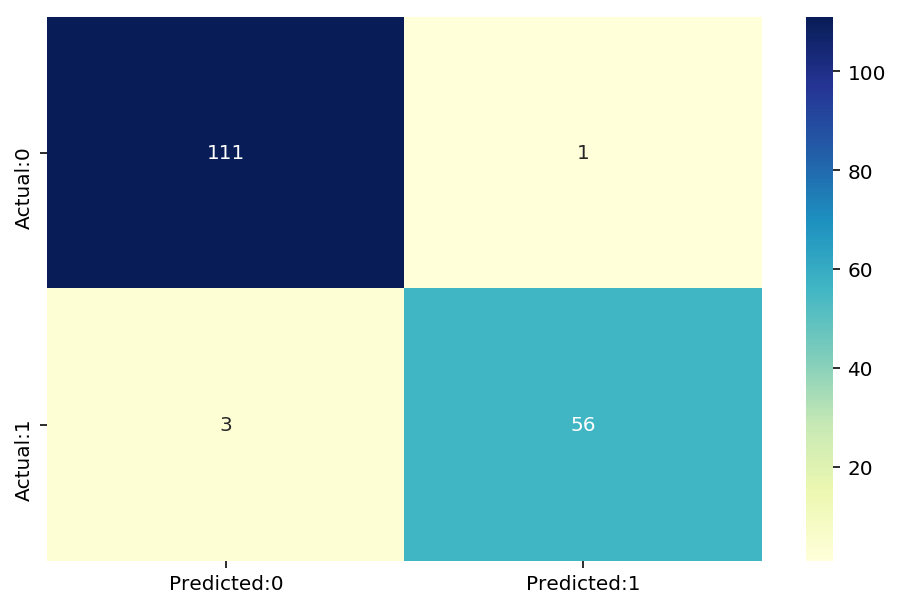

In [206]:
svc_model(best_kernel)

In [207]:
#Decision Tree Classifier
# use the Decision Tree Classifier between a set of max_features and see which returns the best accuracy.

In [208]:
def dt_model_index_max():
    dt_scores = []
    for i in range(1, (X.shape[1]) + 1):
        dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
        dt_classifier.fit(X_train, y_train)
        dt_scores.append(dt_classifier.score(X_test, y_test))
    best_num_features = np.argmax(dt_scores)+1
    plt.plot([i for i in range(1, (X.shape[1]) + 1)], dt_scores, color =     'green')
    for i in range(1, (X.shape[1]) + 1):
        plt.text(i, dt_scores[i-1],  (i))
        plt.xticks([i for i in range(1, X.shape[1] + 1)])
        plt.xlabel('Max features')
        plt.ylabel('Scores')
        plt.title('Decision Tree Classifier scores for different number of maximum features')
    print("max score is {} - at {} features".format(dt_scores[best_num_features-1], best_num_features))
    return(best_num_features)

In [209]:
def dt_model(num_features):
    dt_classifier = DecisionTreeClassifier(max_features=num_features, random_state = 0)
    dt=dt_classifier
    dt.fit(X_train, y_train)
    y_pred=dt.predict(X_train)
    draw_confusion_matrix(y_train,y_pred)
    y_pred=dt.predict(X_test)
    draw_confusion_matrix(y_test,y_pred)
    return dt

max score is 0.9590643274853801 - at 5 features


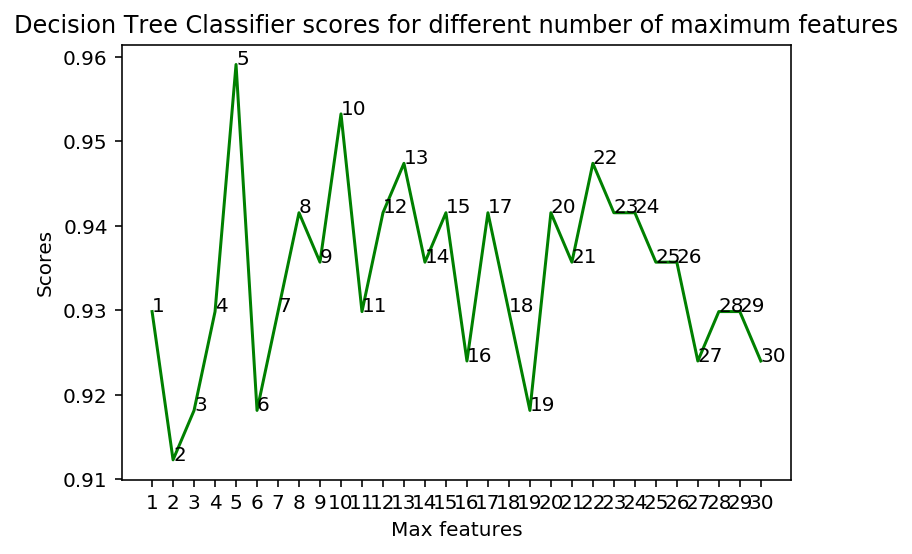

In [210]:
best_num_features = dt_model_index_max()

Acuuracy =  1.0 Sensitivity = 1.0 Specifity = 1.0  Precision = 1.0
Acuuracy =  0.959 Sensitivity = 0.966 Specifity = 0.955  Precision = 0.919


{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 5,
 'random_state': 0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': False,
 'n_features_': 30,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x7f1637239578>}

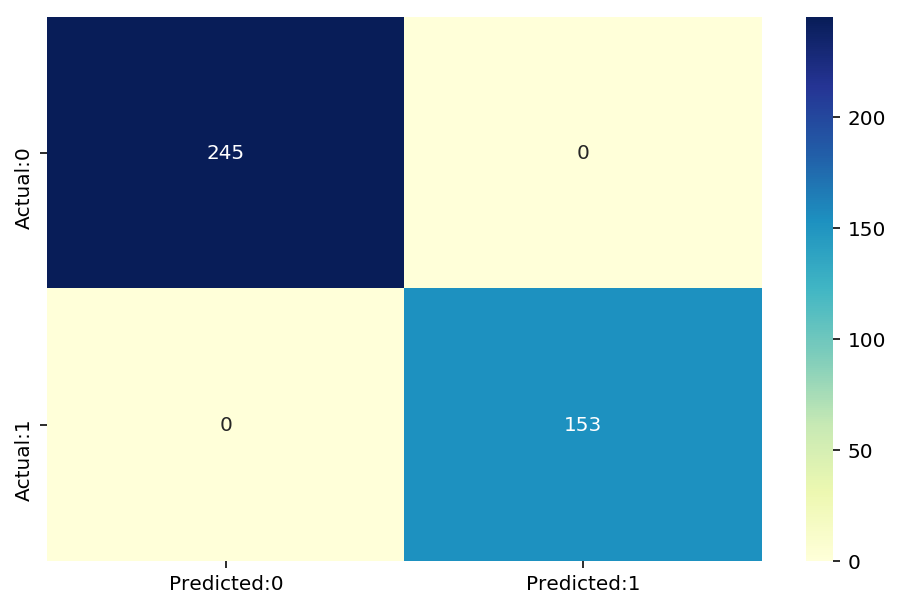

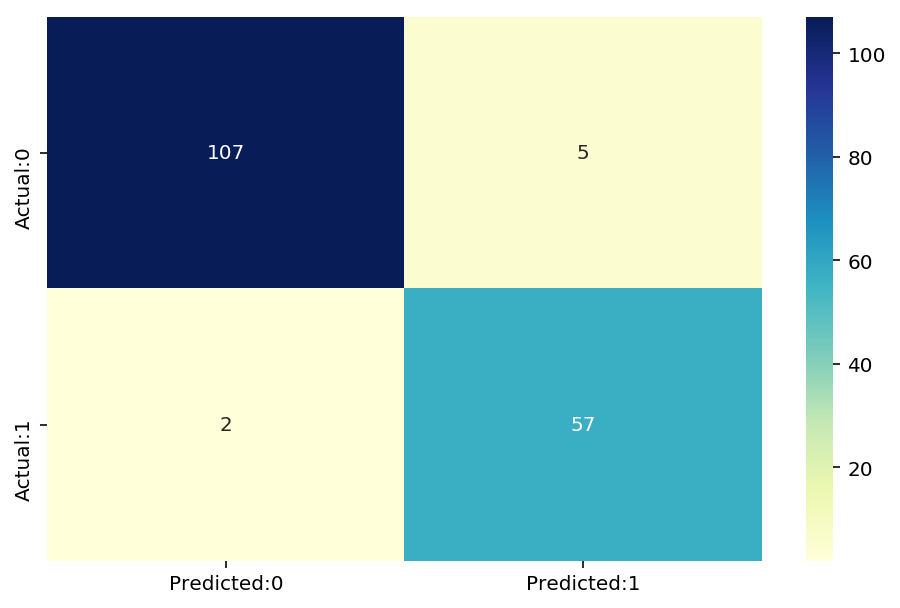

In [211]:
dt = dt_model(best_num_features)
dt.__dict__

In [212]:
def find_features_importance(model):
    from sklearn.feature_selection import SelectFromModel
    sel = SelectFromModel(model)
    sel.fit(X_train, y_train)
    selected_feat= X.columns[sel.get_support()]
    print(selected_feat, len(selected_feat))

In [213]:
find_features_importance(DecisionTreeClassifier(max_features=10, random_state = 0))

Index(['concave points.mean', 'concave points.std', 'texture.w', 'perimeter.w',
       'area.w'],
      dtype='object') 5


In [214]:
find_features_importance(RandomForestClassifier(n_estimators=100))

Index(['perimeter.mean', 'area.mean', 'concave points.mean', 'area.std',
       'radius.w', 'perimeter.w', 'area.w', 'concavity.w', 'concave points.w'],
      dtype='object') 9


In [215]:
def rf_model():
    rf_classifier = RandomForestClassifier(n_estimators = 100)
    rf=rf_classifier
    rf.fit(X_train, y_train)
    y_pred=rf.predict(X_test)
    draw_confusion_matrix(y_test,y_pred)

Acuuracy =  0.971 Sensitivity = 0.966 Specifity = 0.973  Precision = 0.95


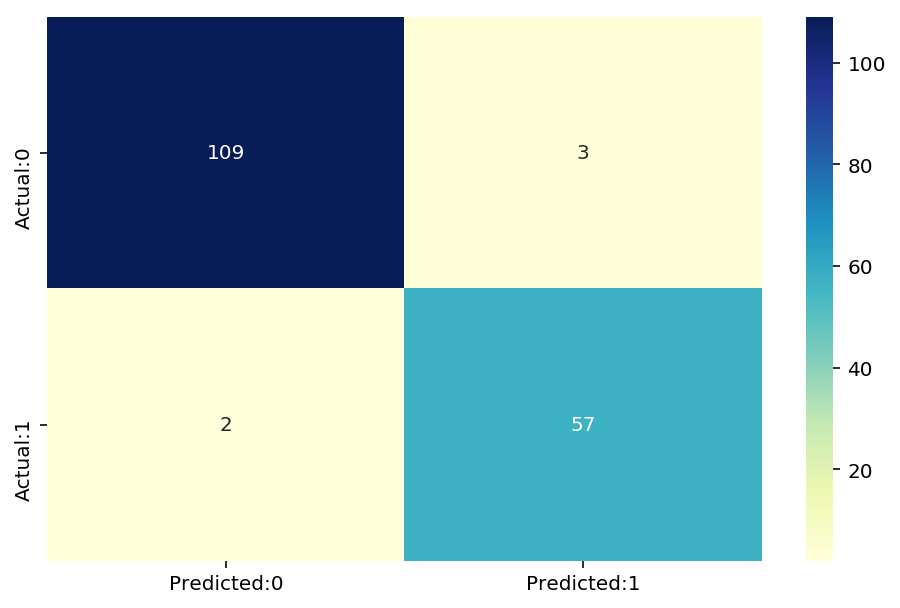

In [216]:
rf_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 32)                992       
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


TRAINING
Acuuracy =  0.975 Sensitivity = 0.941 Specifity = 0.996  Precision = 0.993
VALIDATION
Acuuracy =  0.982 Sensitivity = 0.966 Specifity = 0.991  Precision = 0.983


Train Loss: 0.096       ||   Train Accuarcy: 0.975
Validation Loss: 0.095  ||   Validation Accuarcy: 0.982 

{'batch_size': 32, 'epochs': 48, 'steps': None, 'samples': 398, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}


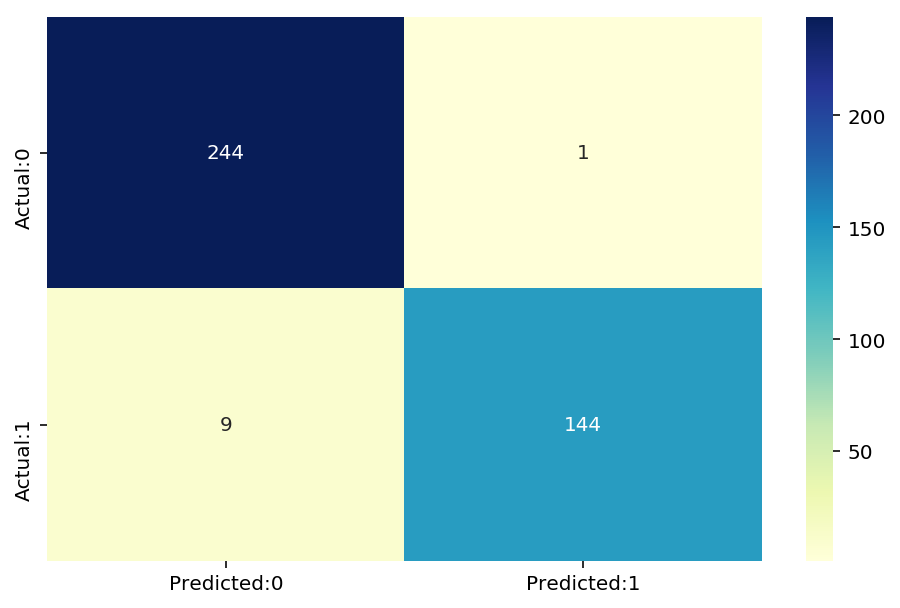

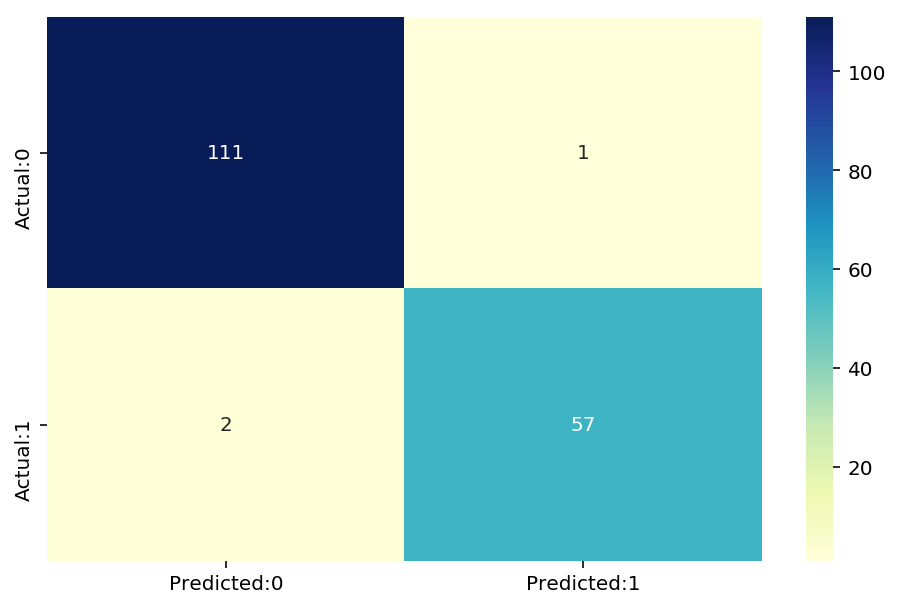

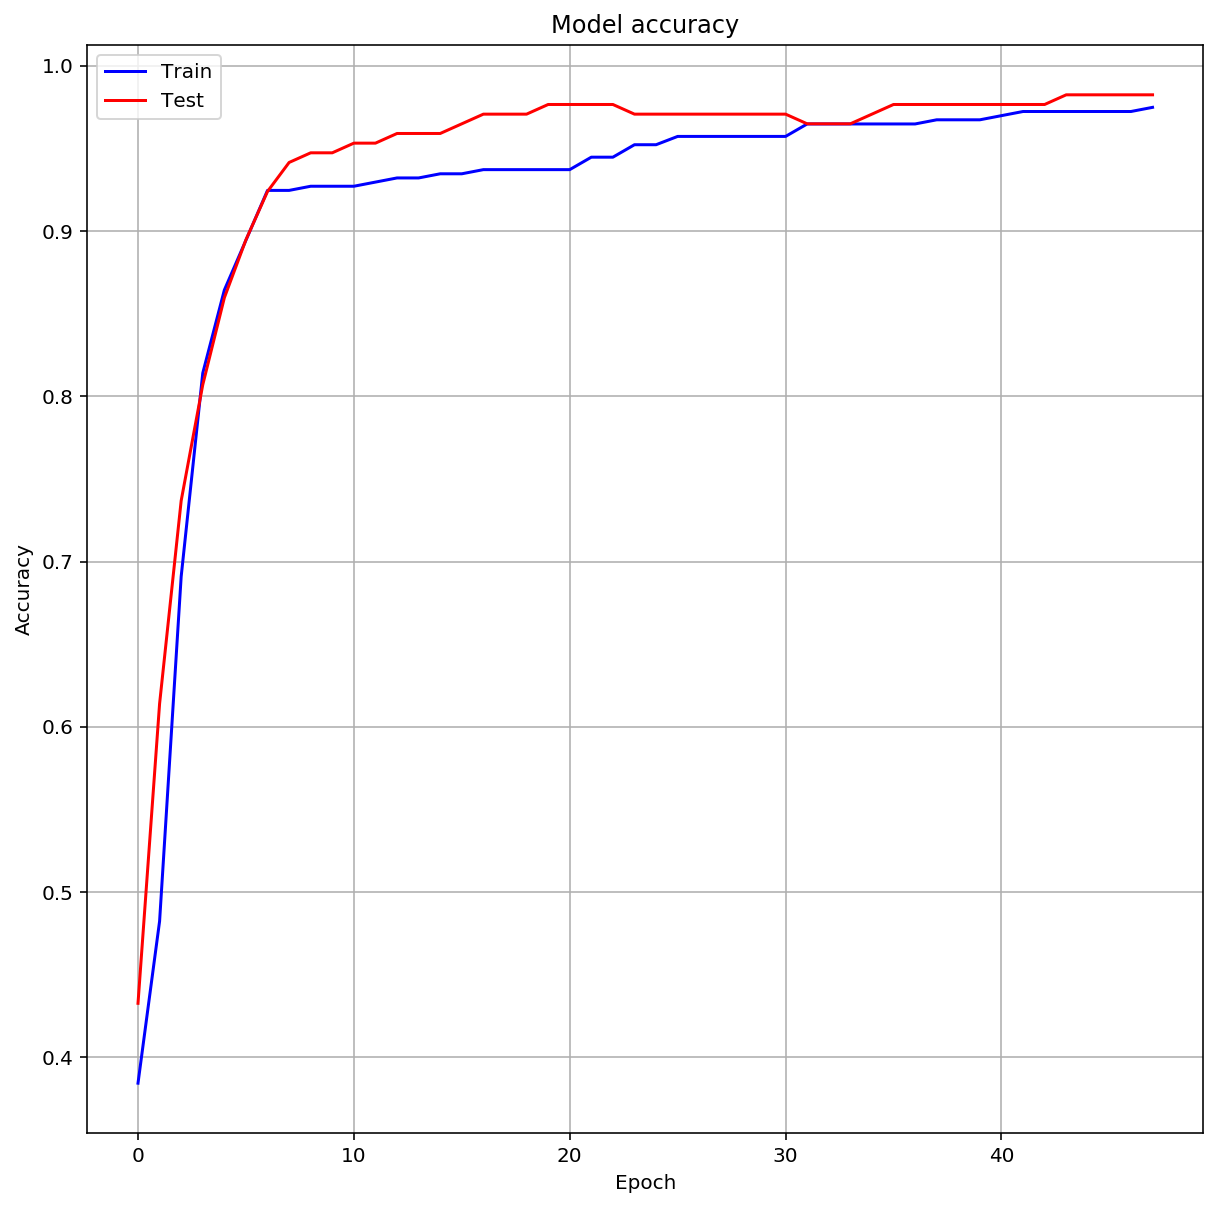

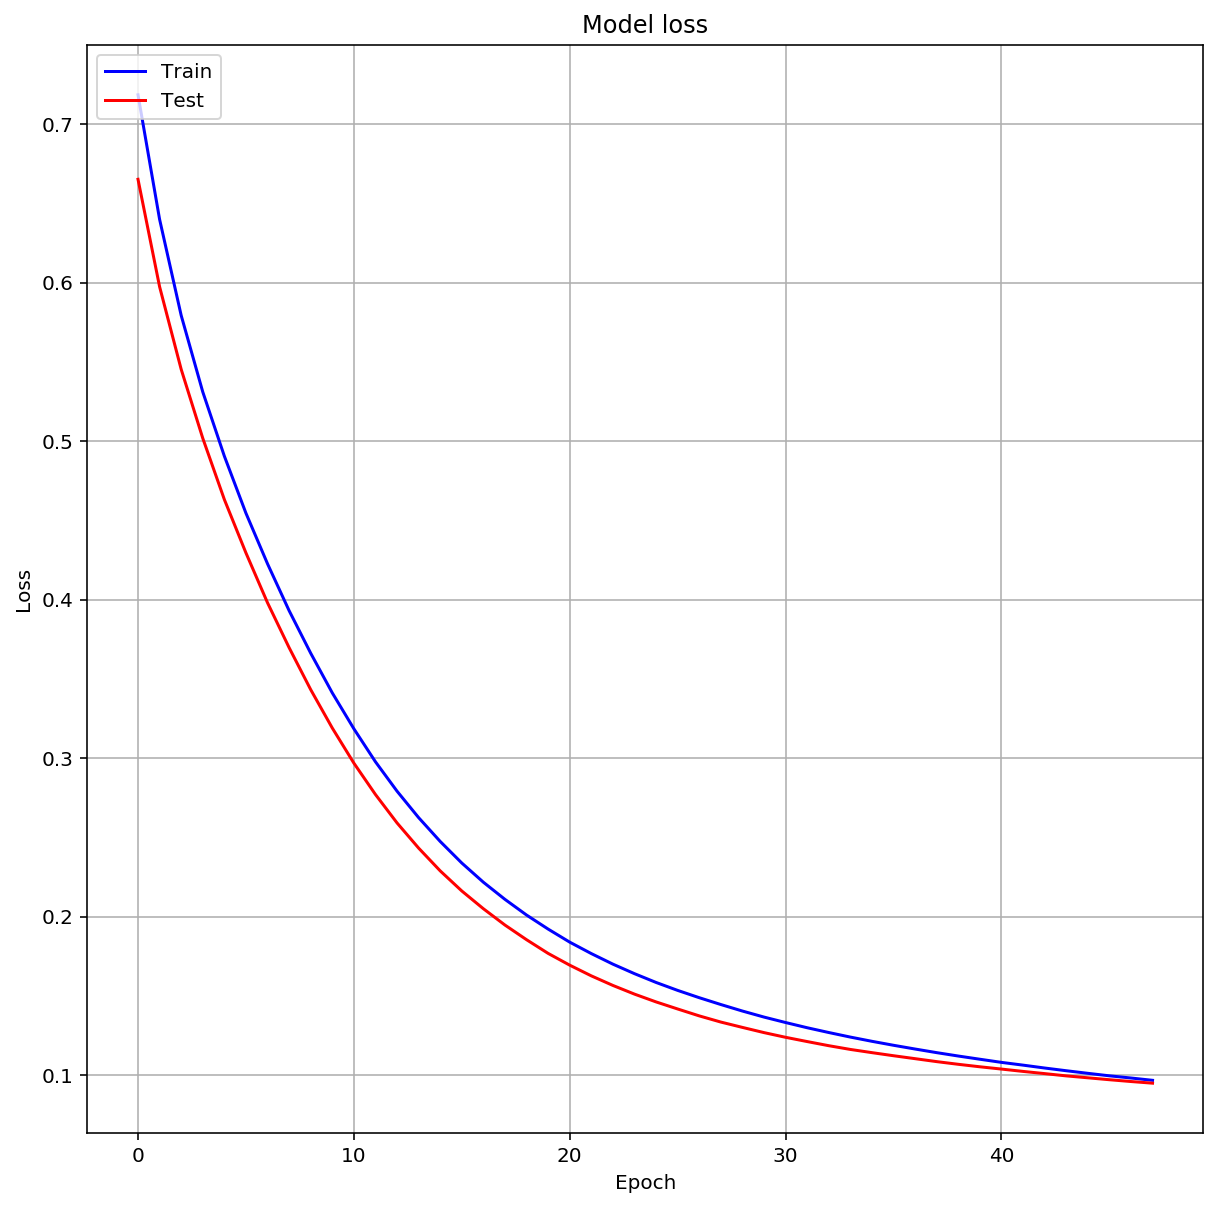

In [217]:
#KERAS MODEL
#NOTE: WE CAN ADD CHANGES TO IMPROVE THE VALIDATION, SPLIT AND SHUFFLE PROCCESSES

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(10,10))
    plt.plot(history.history['acc'],'b-', label='Validate')
    plt.plot(history.history['val_acc'], 'r-', label='Train')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.grid()
    plt.show()
    # Plot training & validation loss values
    plt.figure(figsize=(10,10))
    plt.plot(history.history['loss'],'b-', label='Val')
    plt.plot(history.history['val_loss'], 'r-', label='Train')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.grid()
    plt.show()

def deep_learning_model(epochs_to_run=48):
    import keras
    #`Sequential` from `keras.models`
    #`Dense` from `keras.layers`
    n=X_train.shape[1]

    # Initialize the constructor
    model = keras.models.Sequential()
    # Add first hidden layer
    model.add(keras.layers.Dense(input_shape=(n,), units=32, activation="relu", name="hidden_1"))
    # Add second hidden layer
    model.add(keras.layers.Dense(units=16, activation='relu', name="hidden_2"))
    # Add output layer
    model.add(keras.layers.Dense(units=1, activation='sigmoid', name="output"))
    model.summary()

    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])  # sample_weigths=True
    initial_weights = model.get_weights()
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs_to_run, validation_data=[X_test, y_test], shuffle=True, verbose=0)
    print("TRAINING")
    y_pred = np.round(model.predict(X_train))
    draw_confusion_matrix(y_train,y_pred)
    print("VALIDATION")
    y_pred = np.round(model.predict(X_test))
    draw_confusion_matrix(y_test,y_pred)
    score1 = model.evaluate(X_train, y_train, batch_size=32, verbose=0)
    score2 = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
    print("Train Loss: %.3f       ||   Train Accuarcy: %.3f" % (score1[0],score1[1]))
    print("Validation Loss: %.3f  ||   Validation Accuarcy: %.3f \n" % (score2[0],score2[1]))
    print(history.params)
    plot_history(history)
    return model, initial_weights

model, initial_weights = deep_learning_model(epochs_to_run=48)

Our Implementation of Neural Network
-

In [218]:
#MODEL 1
#GENERIC NEURAL NETWORK WITH BACKPROP AND BINARY CROSSENTROPY LOSS FUNCTION + SGD OPTIMIZER
#THERE WERE MADE CHANGES IN THE WHOLE CODE, THAT WITHOUT THEM, THIS MODEL IS GONNA WORK DIFFERENTLY
# symbols (A,Z,W,b) follow this article: https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795

class Layer:
    def __init__(self, input_shape, units, activation, seed = 2):
        np.random.seed(seed)
        num_features = input_shape[-1]
        limit = np.sqrt(6/(num_features+units))
        self.W = np.random.uniform(low=-limit, high=limit, size=[num_features, units])
        self.b = np.zeros(shape=[units])  # np.random.randn(1, units)
        if activation == "relu":
            self.activation = lambda x: np.maximum(x, 0)
            self.derivative = lambda x: x > 0
        elif activation == "sigmoid":
            self.activation = lambda x: 1/(1+np.exp(-x))
            self.derivative = lambda x: self.activation(x)*(1-self.activation(x)) # (1/(1+np.exp(-x)))*(1-(1/(1+np.exp(-x))))
        else:
            # if you want to add another activation function, you must implement both self.activation and self.derivative
            raise Exception("unknown activation")

    def forward(self, input):
        # the function calculates, saves and returns the output of the layer given an input
        self.A = input
        self.Z = np.dot(input, self.W) + self.b
        return self.activation(self.Z)

    def backward(self, dA):
        # the function calculates the changes in bias and weights of layer, given error dA
        dZ = dA * self.derivative(self.Z)
        self.db = np.mean(dZ, axis=0)
        self.dW = np.mean(np.dot(self.A.T, dZ), axis=0)
        dA = np.dot(self.W, dZ.T)  # this is the error we send to the previous layer
        return dA.T

    def update(self, learning_rate):
        # we use the simplest update rule gradient descent (no momentum, no adaptive learning rate)
        self.W -= learning_rate * self.dW
        self.b -= learning_rate * self.db


class Network:
    def __init__(self):
        # contains the layers
        self.layers = []

    def add_layer(self, layer):
        if len(self.layers) != 0:
            assert(self.layers[-1].W.shape[-1] == layer.W.shape[0]) # check compatabillity of last layer's output with the new layer's input
        self.layers.append(layer)

    def forward(self, input):
        #forward passing the input through the layers
        output = input
        for layer in self.layers:
            output = layer.forward(output)
        return output

    def loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1E-7, 1-(1E-7)) # clip values to avoid undefined log(0)
        return np.mean(-y_true * np.log(y_pred) - (1-y_true) * np.log(1-y_pred)) #loss function of binary_crossentropy

    def loss_derivative(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1E-7, 1-(1E-7)) # clip values to avoid undefined log(0)
        return np.mean(-y_true/y_pred + (1-y_true)/(1-y_pred)) # derivative of binary_crossentropy

    def backward(self, y_true, y_pred, learning_rate):
        # the initial error is given by the derivative of the loss
        dA = self.loss_derivative(y_true, y_pred)
        for layer in reversed(self.layers):  # moving in backward direction fron the output to input
            # each layer is responsible for backward propogating throuth itself - it only needs the error and it returns error for the next layer
            dA = layer.backward(dA)
            # each layer update itself using the learning rate and its calculated corrections
            layer.update(learning_rate)

    def train_step(self, input, y_true, learning_rate):
        # train the network given an input, ground_truth and learning rate
        # returns the loss at this step (before the changes of the weights)
        y_pred = self.forward(input)
        loss = self.loss(y_true, y_pred)
        self.backward(y_true, y_pred, learning_rate)
        return y_pred, loss

    def train(self, X, Y, epochs, learning_rate=0.01 ,batch_size=32, validation_data=None, shuffle = True):
        # main training loop
        # train with X and Y for given number of epochs
        # can handle validation data for displaying validation loss
        # training data (X) and targets (Y) can be shuffled at each epoch
        losses = []
        val_loss = []
        if Y.ndim == 1:
            Y = np.expand_dims(Y, axis=-1)
        if validation_data is not None:
            if validation_data[1].ndim == 1:
                validation_data[1] = np.expand_dims(validation_data[1], axis=-1)
        num_batches = np.ceil(X.shape[0] / batch_size).astype(int)
        indices = list(range(len(X)))
        for k in range(epochs):
            epoch_loss = []
            for batch in range(num_batches):
                x = X[batch*batch_size : (batch+1)*batch_size]
                y = Y[batch*batch_size : (batch+1)*batch_size]
                _, loss = self.train_step(x, y, learning_rate)
                epoch_loss.append(loss)
            # print(self.layers[-1].b)
            losses.append(epoch_loss[-1])
            if k % (max(1, epochs//100)) == 0:
                if validation_data is not None:
                    val_loss.append(self.loss(validation_data[1], self.predict(validation_data[0])))
                    print(k, loss, val_loss[-1])
                else:
                    print(k, loss)
            if shuffle:
                random.shuffle(indices)
                X = X[indices]
                Y = Y[indices]

    def predict(self, X):
        return self.forward(X)

    def display_weigths(self):
        for index, layer in enumerate(self.layers):
            print("W_{}".format(index))
            print(layer.W)
            print("b_{}".format(index))
            print(layer.b)


#The model is overfitting

0 9.210340415134102 10.556881396878854
3 12.66421803330939 10.556881396878854
6 9.210340415134104 10.556881396878854
9 11.512925493917626 10.556881396878854
12 6.90775533635058 10.556881396878854
15 12.66421803330939 10.556881396878854
18 9.210340415134102 10.556881396878854
21 10.361632954525863 10.556881396878854
24 11.512925493917626 10.556881396878854


27 8.059047875742342 10.556881396878854
30 9.210340415134104 10.556881396878854
33 11.51292549391763 10.556881396878854
36 9.210340415134104 10.556881396878854
39 6.90775533635058 10.556881396878854
42 8.059047875742342 10.556881396878854
45 10.361632954525865 10.556881396878854
48 13.815510572701154 10.556881396878854
51 8.059047875742342 10.556881396878854
54 8.059047875742342 10.556881396878854
57 9.210340415134104 10.556881396878854


60 9.210340415134102 10.556881396878854
63 9.210340415134104 10.556881396878854
66 9.210340415134104 10.556881396878854
69 9.210340415134102 10.556881396878854
72 10.361632954525863 10.556881396878854
75 9.210340415134104 10.556881396878854
78 12.664218033309387 10.556881396878854
81 8.059047875742342 10.556881396878854
84 6.90775533635058 10.556881396878854
87 11.512925493917626 10.556881396878854
90 11.512925493917626 10.556881396878854


93 10.361632954525865 10.556881396878854
96 9.210340415134104 10.556881396878854
99 11.51292549391763 10.556881396878854
102 12.66421803330939 10.556881396878854
105 10.361632954525863 10.556881396878854
108 8.059047875742342 10.556881396878854
111 8.059047875742342 10.556881396878854
114 8.059047875742342 10.556881396878854
117 11.512925493917626 10.556881396878854
120 11.512925493917626 10.556881396878854


123 12.66421803330939 10.556881396878854
126 10.361632954525865 10.556881396878854
129 10.361632954525865 10.556881396878854
132 10.361632954525865 10.556881396878854
135 5.756462796958817 10.556881396878854
138 11.512925493917624 10.556881396878854
141 6.90775533635058 10.556881396878854
144 11.512925493917624 10.556881396878854
147 13.815510572701152 10.556881396878854
150 8.059047875742342 10.556881396878854


153 11.512925493917626 10.556881396878854
156 4.605170257567055 10.556881396878854
159 8.059047875742342 10.556881396878854
162 10.361632954525865 10.556881396878854
165 9.210340415134104 10.556881396878854
168 11.512925493917626 10.556881396878854
171 11.512925493917626 10.556881396878854
174 6.90775533635058 10.556881396878854
177 6.90775533635058 10.556881396878854
180 6.90775533635058 10.556881396878854
183 11.51292549391763 10.556881396878854
186 5.756462796958817 10.556881396878854


189 16.118095651484676 10.556881396878854
192 10.361632954525865 10.556881396878854
195 9.210340415134102 10.556881396878854
198 10.361632954525865 10.556881396878854
201 9.210340415134102 10.556881396878854
204 9.210340415134102 10.556881396878854
207 9.210340415134102 10.556881396878854
210 9.210340415134104 10.556881396878854
213 9.210340415134104 10.556881396878854
216 11.512925493917626 10.556881396878854
219 11.51292549391763 10.556881396878854


222 10.361632954525865 10.556881396878854
225 14.966803112092915 10.556881396878854
228 9.210340415134102 10.556881396878854
231 8.059047875742342 10.556881396878854
234 10.361632954525865 10.556881396878854
237 13.815510572701154 10.556881396878854
240 10.361632954525865 10.556881396878854
243 11.512925493917626 10.556881396878854
246 12.66421803330939 10.556881396878854
249 11.51292549391763 10.556881396878854
252 10.361632954525865 10.556881396878854


255 14.966803112092915 10.556881396878854
258 10.361632954525865 10.556881396878854
261 5.756462796958817 10.556881396878854
264 11.512925493917626 10.556881396878854
267 9.210340415134104 10.556881396878854
270 9.210340415134102 10.556881396878854
273 11.512925493917624 10.556881396878854
276 10.361632954525863 10.556881396878854
279 11.512925493917626 10.556881396878854


282 10.361632954525865 10.556881396878854
285 3.453877718175293 10.556881396878854
288 10.361632954525865 10.556881396878854
291 10.361632954525863 10.556881396878854
294 10.361632954525865 10.556881396878854
297 8.059047875742342 10.556881396878854
Acuuracy =  0.345 Sensitivity = 1.0 Specifity = 0.0  Precision = 0.345


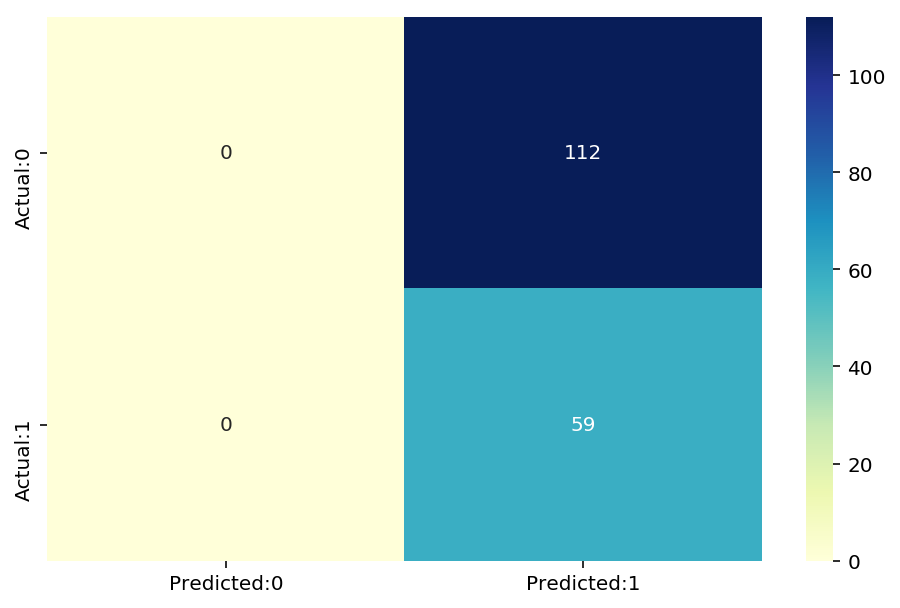

In [220]:
import random

network = Network()
network.add_layer(Layer(input_shape=[30], units=32, activation='relu', seed = 2))
network.add_layer(Layer(input_shape=[32], units=16, activation='sigmoid', seed = 2))
network.add_layer(Layer(input_shape=[16], units=1, activation='sigmoid', seed = 2))
for layer, w, b in zip(network.layers, initial_weights[::2], initial_weights[1::2]): #intializes weights the same as keras
    layer.W = w
    layer.b = b
network.train(X_train, y_train, epochs=300, learning_rate=0.13, validation_data=[X_test, y_test])

y_pred = network.predict(X_test)
draw_confusion_matrix(y_test, np.round(y_pred))